<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [505]:
data_hh = pd.read_csv('D:/data/dst-3.0_16_1_hh_database.csv', sep=';')
data_hh.info()
display(data_hh.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [506]:
data_hh.isnull().sum()


Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [507]:
print(data_hh.columns)

Index(['Пол, возраст', 'ЗП', 'Ищет работу на должность:',
       'Город, переезд, командировки', 'Занятость', 'График', 'Опыт работы',
       'Последнее/нынешнее место работы', 'Последняя/нынешняя должность',
       'Образование и ВУЗ', 'Обновление резюме', 'Авто'],
      dtype='object')


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [508]:
# Создаем новую колонку "Образование", извлекая уровень образования из первых двух слов колонки "Образование и ВУЗ"
data_hh['Образование'] = data_hh['Образование и ВУЗ'].apply(lambda x: ' '.join(x.split()[:2]).lower())

# Проверяем уникальные значения в новой колонке
print(data_hh['Образование'].unique())

# Заменяем по условиям задачи и еще раз проверяем
data_hh.replace('высшее образование', 'высшее', inplace=True)
data_hh.replace('среднее образование', 'среднее', inplace=True)
print(data_hh['Образование'].unique())



# Удаляем исходную колонку "Образование и ВУЗ"
data_hh.drop(columns=['Образование и ВУЗ'], inplace=True)

# Выводим первые несколько строк для проверки
display(data_hh.head())
data_hh['Образование'].value_counts()

['неоконченное высшее' 'высшее образование' 'среднее специальное'
 'среднее образование']
['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее


Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [509]:
# Создаем новый столбец "Пол"
data_hh['Пол'] = data_hh['Пол, возраст'].apply(lambda x: 'М' if 'Мужчина' in x else 'Ж')

# Создаем новый столбец "Возраст"
data_hh['Возраст'] = data_hh['Пол, возраст'].apply(lambda x: int(x.split(',')[1].strip().split()[0]))

# Проверяем уникальные значения в новых столбцах
print(data_hh['Пол'].unique())
print(data_hh['Возраст'].unique())

# Удаляем исходный столбец "Пол, возраст"
data_hh.drop(columns=['Пол, возраст'], inplace=True)

# Выводим первые несколько строк для проверки
display(data_hh.head())
# Вычисляем процент женских резюме
female_percentage = (data_hh['Пол'].value_counts(normalize=True)['Ж'] * 100).round(2)
print(f"Процент женских резюме: {female_percentage}%")
# Вычисляем средний возраст соискателей
average_age = data_hh['Возраст'].mean().round(1)
print(f"Средний возраст соискателей: {average_age} лет")

['М' 'Ж']
[ 39  60  36  38  26  29  46  34  35  59  27  21  31  37  30  33  42  32
  23  28  25  24  43  53  49  44  48  54  22  20  40  62  72  45  41  61
  50  58  57  52  56  18  19  51  16  47  71  63  55  64  68  17  73  66
  65  77  67  69  76  70  14  15 100]


,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26


Процент женских резюме: 19.07%
Средний возраст соискателей: 32.2 лет


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [510]:
# Создаем функцию преобразование
def convert_experience(arg):
    if arg is np.nan or arg == 'Не указано':
        return None
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)
data_hh['Опыт работы (месяц)'] = data_hh['Опыт работы'].apply(convert_experience)
print(data_hh['Опыт работы (месяц)'].head())

# Удаляем и проверяем 
data_hh.drop(columns=['Опыт работы'], inplace=True)
display(data_hh.tail())

median_experience = data_hh['Опыт работы (месяц)'].median()
print(f"Медианный опыт работы (в месяцах): {median_experience}")

0    202.0
1    233.0
2    123.0
3    225.0
4     67.0
Name: Опыт работы (месяц), dtype: float64


,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц)
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22.04.2019 12:32,Не указано,высшее,М,30,91.0
44740,39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...",ИП Пестрецов,Предприниматель,22.04.2019 13:11,Не указано,высшее,М,27,84.0
44741,40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09.04.2019 05:07,Не указано,высшее,Ж,48,257.0
44742,20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,IQ-Maxima,Менеджер проектов,26.04.2019 14:25,Имеется собственный автомобиль,высшее,М,24,46.0
44743,120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,05.07.2018 20:15,Не указано,высшее,М,38,190.0


Медианный опыт работы (в месяцах): 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [511]:
# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

# Функция для извлечения города
def extract_city(location):
    city = location.split(',')[0].strip()
    if city in ['Москва', 'Санкт-Петербург']:
        return city
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

# Функция для определения готовности к переезду
def extract_relocation(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True

# Функция для определения готовности к командировкам
def extract_travel(arg):
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):
            return False
        else: 
            
            return True
    else:
        return False


# Применяем функции к столбцу "Город, переезд, командировки"
data_hh['Город'] = data_hh['Город, переезд, командировки'].apply(extract_city)
data_hh['Готовность к переезду'] = data_hh['Город, переезд, командировки'].apply(extract_relocation)
data_hh['Готовность к командировкам'] = data_hh['Город, переезд, командировки'].apply(extract_travel)

# Удаляем исходный столбец
data_hh.drop(columns=['Город, переезд, командировки'], inplace=True)

# Выводим первые несколько строк для проверки
display(data_hh.head())

# Вычисляем процент соискателей, живущих в Санкт-Петербурге
spb = (data_hh['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100).round()
print(f"Процент соискателей, живущих в Санкт-Петербурге: {spb}%")

# Вычисляем процент соискателей, готовых одновременно и к переездам, и к командировкам
relocation_and_travel = round(data_hh[(data_hh['Готовность к переезду'] == True) & (data_hh['Готовность к командировкам'] == True)].shape[0] / data_hh.shape[0] * 100)
print(f"Процент соискателей, готовых одновременно и к переездам, и к командировкам: {relocation_and_travel}%")

,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам
0,29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,False,False
1,40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,другие,False,True
2,20000 руб.,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,другие,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0,другие,False,True
4,140000 руб.,Региональный менеджер по продажам,полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,Москва,False,True


Процент соискателей, живущих в Санкт-Петербурге: 11.0%
Процент соискателей, готовых одновременно и к переездам, и к командировкам: 32%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [512]:
# Создаем списки для для сортировки признаков
employments = ['полная занятость', 'частичная занятость',
              'проектная работа', 'волонтерство', 'стажировка']
charts = ['полный день', 'сменный график', 
         'гибкий график', 'удаленная работа',
         'вахтовый метод']

# Создаем  признаки для каждого типа занятости и графика работы
for employment in employments:
    data_hh[employment] = data_hh['Занятость'].apply(lambda x: employment in x)

for chart in charts:
    data_hh[chart] = data_hh['График'].apply(lambda x: chart in x)
    
# Удаляем обработанное    
data_hh = data_hh.drop('Занятость', axis=1)
data_hh = data_hh.drop('График', axis=1)
display(data_hh)

print(data_hh[data_hh['проектная работа'] & data_hh['волонтерство']].shape[0])
print(data_hh[data_hh['вахтовый метод'] & data_hh['гибкий график']].shape[0])

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,полная занятость,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,...,True,True,True,False,False,True,True,True,True,True
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,...,True,True,True,False,False,True,True,True,True,False
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,...,True,False,False,False,False,True,False,False,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0,...,True,True,True,False,False,False,False,True,True,False
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22.04.2019 12:32,Не указано,высшее,М,30,91.0,...,True,False,False,False,False,True,False,False,True,False
44740,39000 руб.,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,22.04.2019 13:11,Не указано,высшее,М,27,84.0,...,True,True,True,False,False,True,True,True,True,False
44741,40000 руб.,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09.04.2019 05:07,Не указано,высшее,Ж,48,257.0,...,True,False,False,False,False,True,False,False,True,False
44742,20000 руб.,Контент-менеджер,IQ-Maxima,Менеджер проектов,26.04.2019 14:25,Имеется собственный автомобиль,высшее,М,24,46.0,...,True,True,False,False,False,False,False,False,True,False


436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [513]:
rates = pd.read_csv('ExchangeRates.csv')
display(rates.head())

,currency,per,date,time,close,vol,proportion
0,USD,D,29/12/17,00:00,57.6291,0,1
1,USD,D,30/12/17,00:00,57.6002,0,1
2,USD,D,31/12/17,00:00,57.6002,0,1
3,USD,D,01/01/18,00:00,57.6002,0,1
4,USD,D,02/01/18,00:00,57.6002,0,1


In [514]:
# Переводим признак "Обновление резюме" в формат datetime и достаем из него дату
data_hh['Обновленное резюме'] = pd.to_datetime(data_hh['Обновление резюме'])
data_hh['Дата обновления'] = data_hh['Обновленное резюме'].dt.date

# Переводим признак "date" из таблицы с валютами в формат datetime
rates['date'] = pd.to_datetime(rates['date'], format='%d/%m/%y').dt.date

# Выделяем сумму желаемой заработной платы и наименование валюты
def extract_salary_currency(salary):
    amount, currency = salary.split()
    return float(amount), currency

data_hh[['Сумма ЗП', 'Валюта']] = data_hh['ЗП'].apply(lambda x: pd.Series(extract_salary_currency(x)))

# Приводим наименование валюты к стандарту ISO
currency_mapping = {
    'руб.': 'RUB',
    'USD': 'USD',
    'EUR': 'EUR',
    'грн.': 'UAH',
    'KZT': 'KZT',
    'бел.руб.': 'BYN',
    'UZS': 'UZS',
    'KGS': 'KGS',
    'AZN': 'AZN'
}
data_hh['Валюта'] = data_hh['Валюта'].map(currency_mapping)

# Присоединяем таблицу с курсами валют к таблице с резюме
data_hh = data_hh.merge(rates, how='left', left_on=['Дата обновления', 'Валюта'], right_on=['date', 'currency'])

# Заполняем значение close для рубля единицей
data_hh.loc[data_hh['Валюта'] == 'RUB', 'close'] = 1
data_hh.loc[data_hh['Валюта'] == 'RUB', 'proportion'] = 1
# Заполняем пропуски в столбцах close и proportion значением 1 для случаев, где курс валюты отсутствует
data_hh['close'].fillna(1, inplace=True)
data_hh['proportion'].fillna(1, inplace=True)
# Умножаем сумму желаемой заработной платы на курс валюты и делим на пропорцию
data_hh['ЗП (руб)'] = data_hh['Сумма ЗП'] * data_hh['close'] / data_hh['proportion']

# Удаляем исходный столбец заработной платы и промежуточные столбцы
data_hh.drop(columns=['ЗП', 'Сумма ЗП', 'Валюта', 'Дата обновления', 'currency', 'date', 'time', 'close', 'vol', 'proportion', 'per', 'Обновленное резюме'], inplace=True)

# Выводим первые несколько строк для проверки
display(data_hh.head())

median_salary = data_hh['ЗП (руб)'].median()
print(f"Медианная заработная плата соискателей: {median_salary} руб.")

C:\Users\user\AppData\Local\Temp\ipykernel_9116\915476404.py:2: UserWarning:

Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\user\AppData\Local\Temp\ipykernel_9116\915476404.py:36: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\user\AppData\Local\Temp\ipykernel_9116\915476404.py:37: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace 

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,...,True,True,False,False,True,True,True,True,True,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,другие,...,True,True,False,False,True,True,True,True,False,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,другие,...,False,False,False,False,True,False,False,False,False,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0,другие,...,True,True,False,False,False,False,True,True,False,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,Москва,...,False,False,False,False,True,False,False,False,False,140000.0


Медианная заработная плата соискателей: 59079.65 руб.


In [515]:
data_hh.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятость  

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

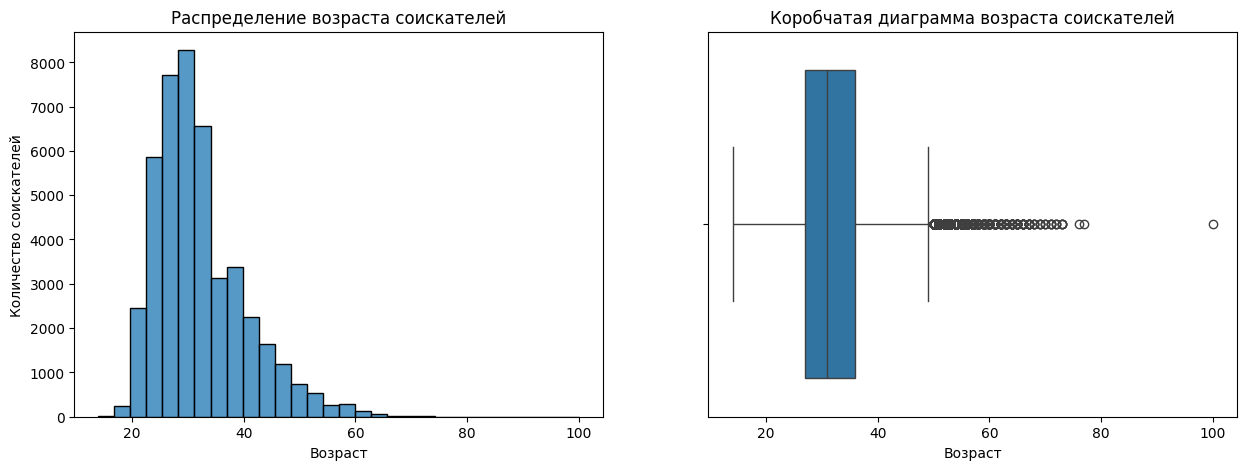

Мода распределения: 30 лет
Минимальное значение: 14 лет
Максимальное значение: 100 лет
Возраст большинства соискателей находится в интервале: 27.0 - 36.0 лет
Количество аномалий: 1774, что составляет 3.96%
Аномальные значения возраста: [ 60  59  53  54  62  72  61  50  58  57  52  56  51  71  63  55  64  68
  73  66  65  77  67  69  76  70 100]


In [516]:
# Построение гистограммы и коробчатой диаграммы для признака "Возраст"
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Гистограмма
sns.histplot(data_hh['Возраст'], bins=30, ax=axes[0])
axes[0].set_title('Распределение возраста соискателей')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество соискателей')

# Коробчатая диаграмма
sns.boxplot(x=data_hh['Возраст'], ax=axes[1])
axes[1].set_title('Коробчатая диаграмма возраста соискателей')
axes[1].set_xlabel('Возраст')

plt.show()

# Вычисление моды, минимального и максимального значения
mode_age = data_hh['Возраст'].mode()[0]
min_age = data_hh['Возраст'].min()
max_age = data_hh['Возраст'].max()

print(f"Мода распределения: {mode_age} лет")
print(f"Минимальное значение: {min_age} лет")
print(f"Максимальное значение: {max_age} лет")

# Определение интервала, в котором находится возраст большинства соискателей
age_interval = data_hh['Возраст'].quantile([0.25, 0.75]).values
print(f"Возраст большинства соискателей находится в интервале: {age_interval[0]} - {age_interval[1]} лет")

# Определение аномалий
q1 = data_hh['Возраст'].quantile(0.25)
q3 = data_hh['Возраст'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

anomalies = data_hh[(data_hh['Возраст'] < lower_bound) | (data_hh['Возраст'] > upper_bound)]
anomalies_percentage = (anomalies.shape[0] / data_hh['Возраст'].shape[0]) * 100

print(f"Количество аномалий: {anomalies.shape[0]}, что составляет {anomalies_percentage:.2f}%")
print(f"Аномальные значения возраста: {anomalies['Возраст'].unique()}")

ваши выводы по графику здесь

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

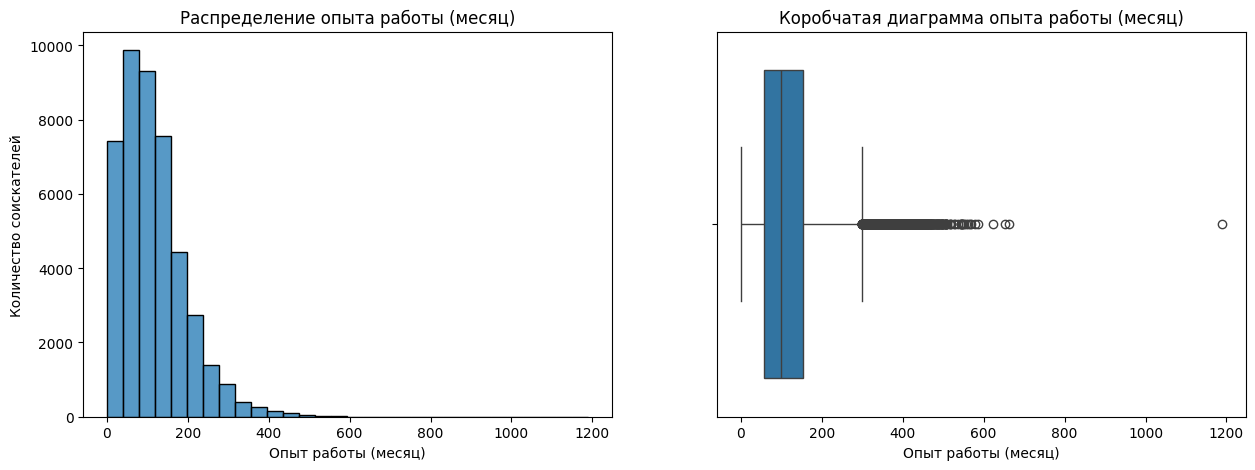

Мода распределения: 81.0 месяцев
Минимальное значение: 1.0 месяцев
Максимальное значение: 1188.0 месяцев
Опыт работы большинства соискателей находится в интервале: 57.0 - 154.0 месяцев
Количество аномалий: 1276, что составляет 2.85%
Аномальные значения опыта работы: [ 510.  325.  303.  360.  312.  324.  468.  507.  469.  401.  330.  438.
  417.  389.  370.  334.  321.  442.  377.  317.  302.  357.  358.  300.
  455.  402.  452.  307.  304.  322.  301.  345.  306.  497.  340.  369.
  399.  384.  439.  382.  421.  314.  359.  348.  309.  425.  313.  495.
  310.  400.  347.  423.  308.  429.  315.  411.  338.  363.  383.  373.
  482.  388.  352.  380.  366.  333.  329.  362.  343.  461.  350.  311.
  446.  332.  367.  454.  447.  341.  407.  392.  663.  403.  517.  374.
  316.  424.  337.  305.  414.  467.  356.  390.  355.  394.  418.  420.
  443.  504.  437.  496.  335.  346.  546.  457.  412.  344.  393.  342.
  323.  410.  365.  406.  396.  408.  351.  458.  331.  415.  319.  385.
  3

In [517]:
# Построение гистограммы и коробчатой диаграммы для признака "Опыт работы (месяц)"
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Гистограмма
sns.histplot(data_hh['Опыт работы (месяц)'].dropna(), bins=30, ax=axes[0])
axes[0].set_title('Распределение опыта работы (месяц)')
axes[0].set_xlabel('Опыт работы (месяц)')
axes[0].set_ylabel('Количество соискателей')

# Коробчатая диаграмма
sns.boxplot(x=data_hh['Опыт работы (месяц)'].dropna(), ax=axes[1])
axes[1].set_title('Коробчатая диаграмма опыта работы (месяц)')
axes[1].set_xlabel('Опыт работы (месяц)')

plt.show()

# Вычисление моды, минимального и максимального значения
mode_experience = data_hh['Опыт работы (месяц)'].mode()[0]
min_experience = data_hh['Опыт работы (месяц)'].min()
max_experience = data_hh['Опыт работы (месяц)'].max()

print(f"Мода распределения: {mode_experience} месяцев")
print(f"Минимальное значение: {min_experience} месяцев")
print(f"Максимальное значение: {max_experience} месяцев")

# Определение интервала, в котором находится опыт работы большинства соискателей
experience_interval = data_hh['Опыт работы (месяц)'].quantile([0.25, 0.75]).values
print(f"Опыт работы большинства соискателей находится в интервале: {experience_interval[0]} - {experience_interval[1]} месяцев")

# Определение аномалий
q1_experience = data_hh['Опыт работы (месяц)'].quantile(0.25)
q3_experience = data_hh['Опыт работы (месяц)'].quantile(0.75)
iqr_experience = q3_experience - q1_experience
lower_bound_experience = q1_experience - 1.5 * iqr_experience
upper_bound_experience = q3_experience + 1.5 * iqr_experience

anomalies_experience = data_hh[(data_hh['Опыт работы (месяц)'] < lower_bound_experience) | (data_hh['Опыт работы (месяц)'] > upper_bound_experience)]
anomalies_experience_percentage = (anomalies_experience.shape[0] / data_hh['Опыт работы (месяц)'].shape[0]) * 100
print(f"Количество аномалий: {anomalies_experience.shape[0]}, что составляет {anomalies_experience_percentage:.2f}%")
print(f"Аномальные значения опыта работы: {anomalies_experience['Опыт работы (месяц)'].unique()}")

ваши выводы здесь

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


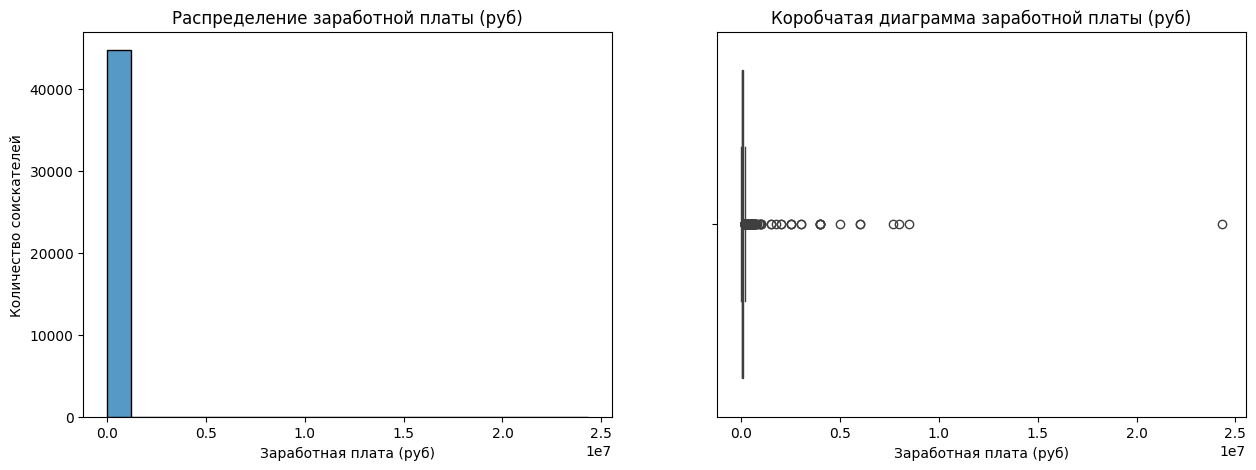

Минимальное значение заработной платы: 1.0 руб.
Максимальное значение заработной платы: 24304876.0 руб.
Заработная плата большинства соискателей находится в интервале: 38000.0 - 95000.0 руб.
Количество аномалий: 2801, что составляет 6.26%
Аномальные значения заработной платы: [  250000.       260000.       350000.       355736.7      300000.
   500000.       343444.       400000.       370000.       200000.
   185000.       399583.25     639602.      1000000.       190000.
   230000.       645171.       270000.       240000.       280000.
   191880.6      225000.       261628.8      285000.       255919.2
   210000.      4000000.       220000.       360000.      2000000.
   215769.6      194038.2      237854.       256000.       320000.
   196221.6      195000.       261000.       653101.       218838.
   226377.9      209000.       450000.       258717.6      191939.4
   265000.       201528.8      600000.       385481.4      330000.
   340000.       185437.5      279000.       187099

In [518]:
# Построение гистограммы и коробчатой диаграммы для признака "ЗП (руб)"
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Гистограмма
sns.histplot(data_hh['ЗП (руб)'], bins=20, ax=axes[0])
axes[0].set_title('Распределение заработной платы (руб)')
axes[0].set_xlabel('Заработная плата (руб)')
axes[0].set_ylabel('Количество соискателей')

# Коробчатая диаграмма
sns.boxplot(x=data_hh['ЗП (руб)'], ax=axes[1])
axes[1].set_title('Коробчатая диаграмма заработной платы (руб)')
axes[1].set_xlabel('Заработная плата (руб)')

plt.show()

# Вычисление минимального и максимального значения
min_salary = data_hh['ЗП (руб)'].min()
max_salary = data_hh['ЗП (руб)'].max()

print(f"Минимальное значение заработной платы: {min_salary} руб.")
print(f"Максимальное значение заработной платы: {max_salary} руб.")

# Определение интервала, в котором находится заработная плата большинства соискателей
salary_interval = data_hh['ЗП (руб)'].quantile([0.25, 0.75]).values
print(f"Заработная плата большинства соискателей находится в интервале: {salary_interval[0]} - {salary_interval[1]} руб.")

# Определение аномалий
q1_salary = data_hh['ЗП (руб)'].quantile(0.25)
q3_salary = data_hh['ЗП (руб)'].quantile(0.75)
iqr_salary = q3_salary - q1_salary
lower_bound_salary = q1_salary - 1.5 * iqr_salary
upper_bound_salary = q3_salary + 1.5 * iqr_salary

anomalies_salary = data_hh[(data_hh['ЗП (руб)'] < lower_bound_salary) | (data_hh['ЗП (руб)'] > upper_bound_salary)]
anomalies_salary_percentage = (anomalies_salary.shape[0] / data_hh['ЗП (руб)'].shape[0]) * 100
print(f"Количество аномалий: {anomalies_salary.shape[0]}, что составляет {anomalies_salary_percentage:.2f}%")
print(f"Аномальные значения заработной платы: {anomalies_salary['ЗП (руб)'].unique()}")
print(f"Количество соискателей, требующих заработную плату выше 1 миллиона рублей: {data_hh[data_hh['ЗП (руб)'] > 1000000].shape[0]}")


ваши выводы здесь

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

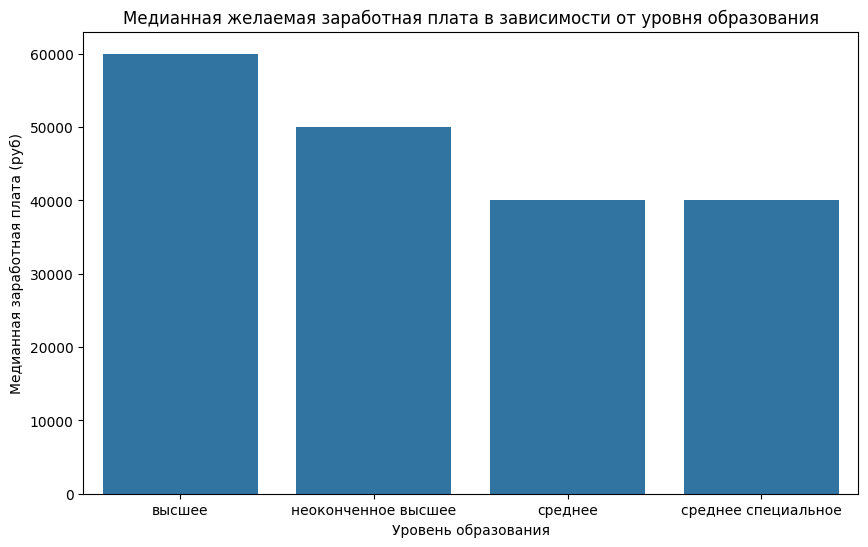

In [519]:
# Фильтруем данные, оставляя только те резюме, где желаемая заработная плата меньше 1 миллиона рублей
filtered_data = data_hh[data_hh['ЗП (руб)'] < 1000000]

# Группируем данные по уровню образования и вычисляем медианную заработную плату
median_salary_by_education = filtered_data.groupby('Образование')['ЗП (руб)'].median().reset_index()

# Строим диаграмму
plt.figure(figsize=(10, 6))
sns.barplot(data=median_salary_by_education, x='Образование', y='ЗП (руб)')
plt.title('Медианная желаемая заработная плата в зависимости от уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Медианная заработная плата (руб)')
plt.show()

# Выводы по диаграмме
# Наибольший уровень желаемой заработной платы наблюдается у соискателей с высшим образованием.
# Наименьший уровень желаемой заработной платы наблюдается у соискателей со средним и средним специальным образованием.
# Признак уровня образования важен при прогнозировании заработной платы, так как он влияет на медианный уровень желаемой заработной платы.


ваши выводы здесь

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

C:\Users\user\AppData\Local\Temp\ipykernel_9116\3698209093.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




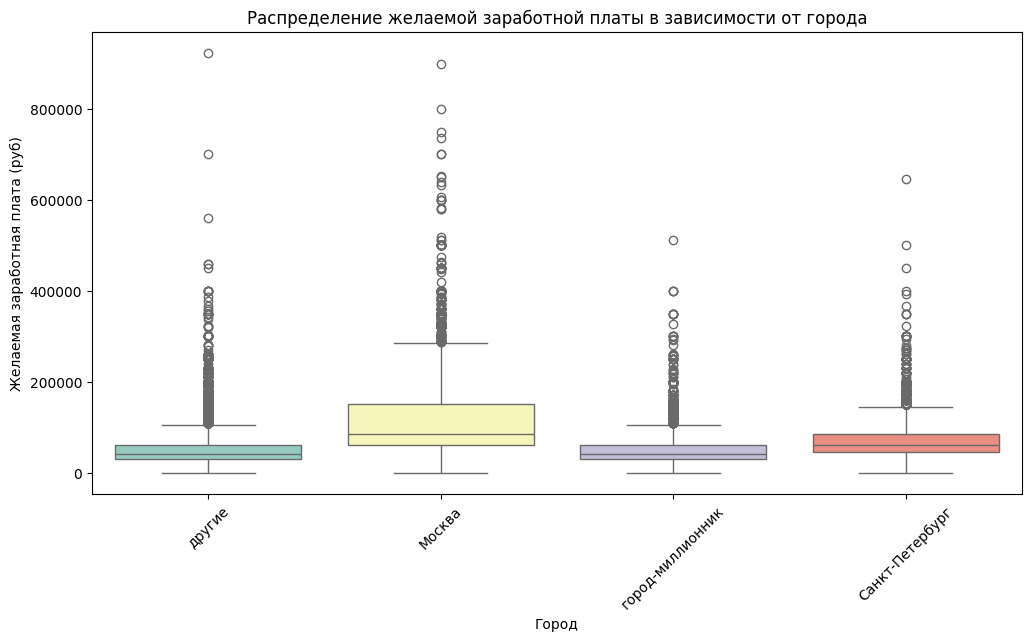

In [520]:
# Фильтруем данные, оставляя только те резюме, где желаемая заработная плата меньше 1 млн рублей
filtered_data = data_hh[data_hh['ЗП (руб)'] < 1e6]

# Строим диаграмму boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Город', y='ЗП (руб)', palette='Set3')
plt.title('Распределение желаемой заработной платы в зависимости от города')
plt.xlabel('Город')
plt.ylabel('Желаемая заработная плата (руб)')
plt.xticks(rotation=45)
plt.show()

ваши выводы здесь

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

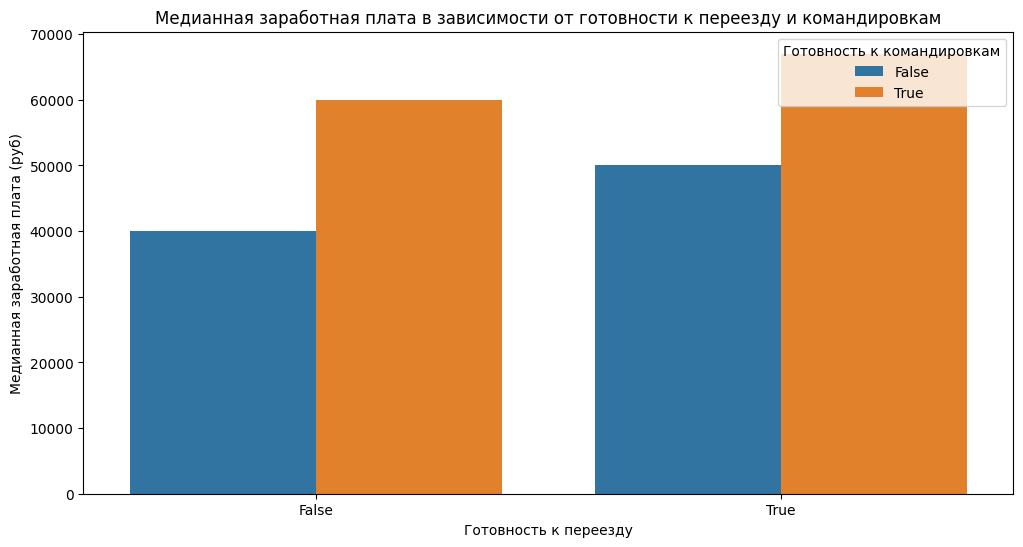

Желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам: 67000.0 руб.


In [521]:
# Группируем данные по признакам "Готовность к переезду" и "Готовность к командировкам" и вычисляем медианную заработную плату
median_salary_by_relocation_travel = data_hh.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().reset_index()

# Строим многоуровневую столбчатую диаграмму
plt.figure(figsize=(12, 6))
sns.barplot(data=median_salary_by_relocation_travel, x='Готовность к переезду', y='ЗП (руб)', hue='Готовность к командировкам')
plt.title('Медианная заработная плата в зависимости от готовности к переезду и командировкам')
plt.xlabel('Готовность к переезду')
plt.ylabel('Медианная заработная плата (руб)')
plt.legend(title='Готовность к командировкам')
plt.show()

median_salary_relocation_travel = median_salary_by_relocation_travel[
    (median_salary_by_relocation_travel['Готовность к переезду'] == True) & 
    (median_salary_by_relocation_travel['Готовность к командировкам'] == True)
]['ЗП (руб)'].values[0]

print(f"Желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам: {median_salary_relocation_travel} руб.")

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [522]:
# Создаем сводную таблицу
pivot_table = data_hh.pivot_table(
    values='ЗП (руб)',
    index='Возраст',
    columns='Образование',
    aggfunc='median'
)

# Строим тепловую карту
fig = px.imshow(
    pivot_table,
    labels=dict(x="Образование", y="Возраст", color="Медианная ЗП (руб)"),
    title="Тепловая карта медианной желаемой заработной платы от возраста и образования"
)
fig.show()

ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

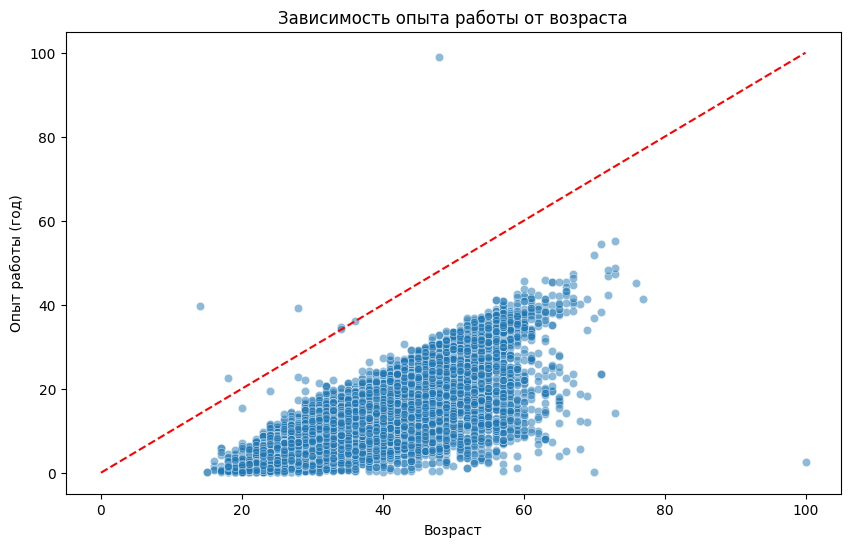

In [523]:
# Переводим опыт работы из месяцев в годы
scatter_data = data_hh.copy()
scatter_data['Опыт работы (год)'] = scatter_data['Опыт работы (месяц)']/12

# Строим диаграмму рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_data, x='Возраст', y='Опыт работы (год)', alpha=0.5)

# Добавляем прямую, проходящую через точки (0, 0) и (100, 100)
plt.plot([0, 100], [0, 100], color='red', linestyle='--')

plt.title('Зависимость опыта работы от возраста')
plt.xlabel('Возраст')
plt.ylabel('Опыт работы (год)')
plt.show()

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [524]:
duplicates = data_hh[data_hh.duplicated(subset=data_hh.columns)]

data_hh = data_hh.drop_duplicates()
print(duplicates.shape[0])


158


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [525]:
null_data = data_hh.isnull().sum()
null_data


Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [526]:
# Удаляем строки с пропусками в столбцах "Последнее/нынешнее место работы" и "Последняя/нынешняя должность"
data_hh.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'], inplace=True)

# Заполняем пропуски в столбце "Опыт работы (месяц)" медианным значением
median_experience = data_hh['Опыт работы (месяц)'].median()
data_hh['Опыт работы (месяц)'].fillna(median_experience, inplace=True)

# Проверяем результат
print(data_hh.isnull().sum())

data_hh['Опыт работы (месяц)'].mean()

Ищет работу на должность:          0
Последнее/нынешнее место работы    0
Последняя/нынешняя должность       0
Обновление резюме                  0
Авто                               0
Образование                        0
Пол                                0
Возраст                            0
Опыт работы (месяц)                0
Город                              0
Готовность к переезду              0
Готовность к командировкам         0
полная занятость                   0
частичная занятость                0
проектная работа                   0
волонтерство                       0
стажировка                         0
полный день                        0
сменный график                     0
гибкий график                      0
удаленная работа                   0
вахтовый метод                     0
ЗП (руб)                           0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_9116\2317761433.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





np.float64(114.35831239906693)

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [527]:
# Удаляем резюме с заработной платой выше 1 млн. рублей или ниже 1 тыс. рублей
data_hh_drop= data_hh[(data_hh['ЗП (руб)'] >= 1000000) | (data_hh['ЗП (руб)'] <= 1000)]
data_hh = data_hh.drop(data_hh_drop.index)
# Проверяем результат
print(data_hh_drop.shape[0])

131


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [528]:
# Находим резюме, в которых опыт работы в годах превышает возраст соискателя
invalid_experience = data_hh[data_hh['Опыт работы (месяц)']/12 > data_hh['Возраст']]

# Удаляем такие резюме из данных
data_hh = data_hh.drop(invalid_experience.index)

# Проверяем результат
print(f"Количество удаленных резюме: {invalid_experience.shape[0]}")

Количество удаленных резюме: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

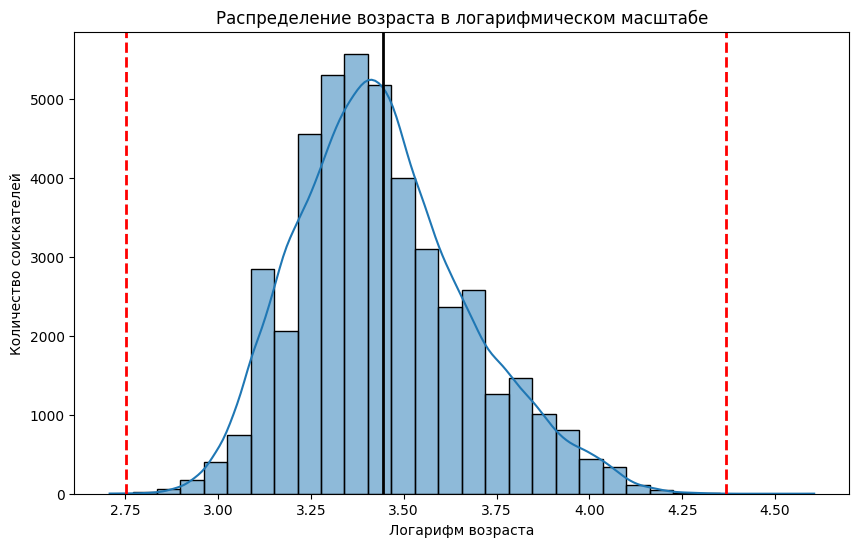

Количество выбросов: 3


,Возраст
31137,15
32950,15
33654,100


Количество оставшихся записей: 44443


In [529]:


# Преобразуем возраст в логарифмический масштаб
log_age = np.log(data_hh['Возраст'])

# Строим гистограмму в логарифмическом масштабе
plt.figure(figsize=(10, 6))
histplot = sns.histplot(log_age, bins=30, kde=True)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean() - 3 * log_age.std(), color='r', linestyle='--', lw=2)
histplot.axvline(log_age.mean() + 4 * log_age.std(), color='r', linestyle='--', lw=2)
plt.title('Распределение возраста в логарифмическом масштабе')
plt.xlabel('Логарифм возраста')
plt.ylabel('Количество соискателей')
plt.show()

# Вычисляем z-отклонения
z_scores = (log_age - log_age.mean()) / log_age.std()

# Определяем выбросы
outliers = data_hh[(z_scores < -3) | (z_scores > 4)]
print(f"Количество выбросов: {outliers.shape[0]}")
display(outliers[['Возраст']])

# Удаляем выбросы из данных
data_hh = data_hh[~((z_scores < -3) | (z_scores > 4))]

# Проверяем результат
print(f"Количество оставшихся записей: {data_hh.shape[0]}")

In [530]:
data_hh.head()

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,...,True,True,False,False,True,True,True,True,True,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,другие,...,True,True,False,False,True,True,True,True,False,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,другие,...,False,False,False,False,True,False,False,False,False,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0,другие,...,True,True,False,False,False,False,True,True,False,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,Москва,...,False,False,False,False,True,False,False,False,False,140000.0


ваш коммментарий здесь